<a href="https://colab.research.google.com/github/AndresChavez123/Sys2025-2/blob/main/CircuitoRLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.1 MB/s eta 0:00:00



# Simulación Completa de un Sistema Masa–Resorte–Amortiguador (MRA)

Este cuaderno implementa una simulación completa de un sistema dinámico de **segundo orden**, modelado como:

\[
G(s) = \frac{1}{ms^2 + cs + k}
\]

donde m = masa, c = amortiguamiento y k = constante del resorte.

Se analizan tres casos:

1. Subamortiguado  (\(\zeta < 1\))
2. Crítico         (\(\zeta = 1\))
3. Sobreamortiguado (\(\zeta > 1\))

Incluye:

- Polos y ceros
- Bode
- Impulso
- Escalón
- Rampa
- Cálculo de parámetros dinámicos



## Importaciones necesarias



## Funciones auxiliares
Estas funciones permiten:
- Graficar polos y ceros
- Graficar Bode
- Respuesta impulso, escalón y rampa
- Calcular parámetros (\(\omega_n, \zeta, \omega_d\))



## Definición de los tres casos de amortiguamiento
Se analizan:

- Subamortiguado
- Críticamente amortiguado
- Sobreamortiguado



# Ejecución de los 3 casos
A continuación se ejecutan TODAS las simulaciones para cada caso.


      CASO: Subamortiguado
 m = 1, c = 1, k = 100
 wn = 10.0000 rad/s
 zeta = 0.0500
 wd = 9.9875 rad/s (si aplica)


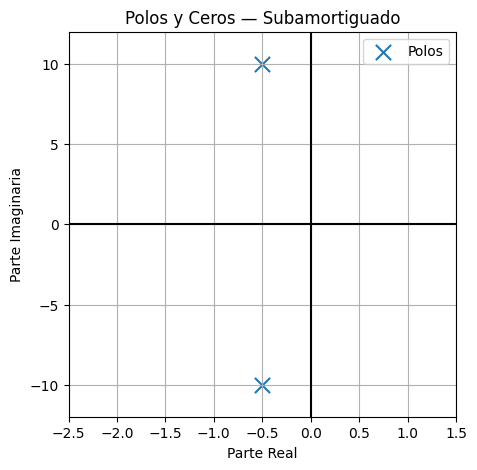

/usr/local/lib/python3.12/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


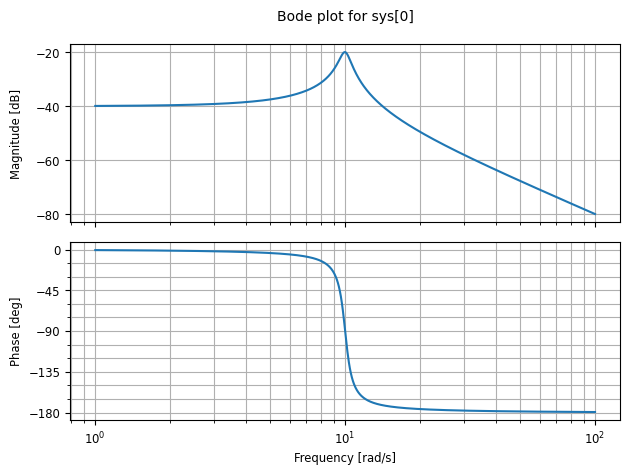

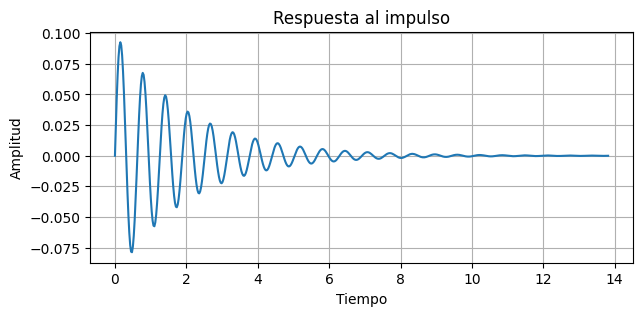

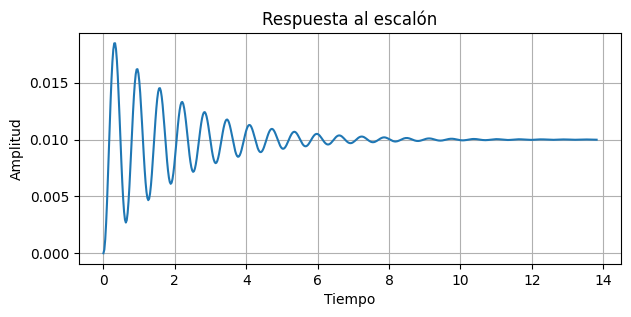

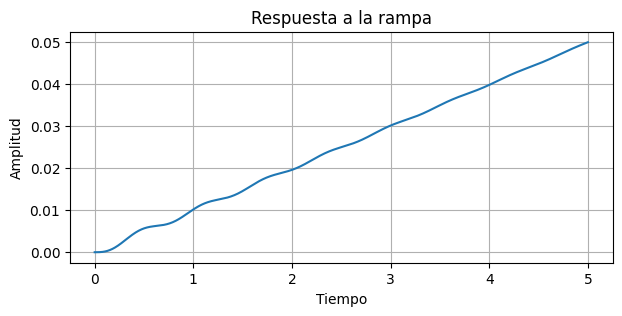

      CASO: Crítico
 m = 1, c = 20, k = 100
 wn = 10.0000 rad/s
 zeta = 1.0000
 wd = 0.0000 rad/s (si aplica)


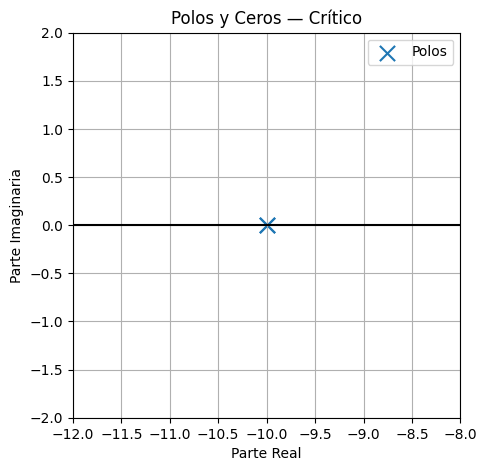

/usr/local/lib/python3.12/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


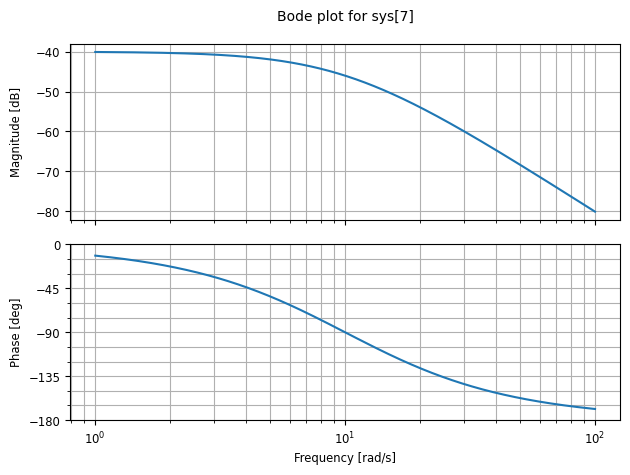

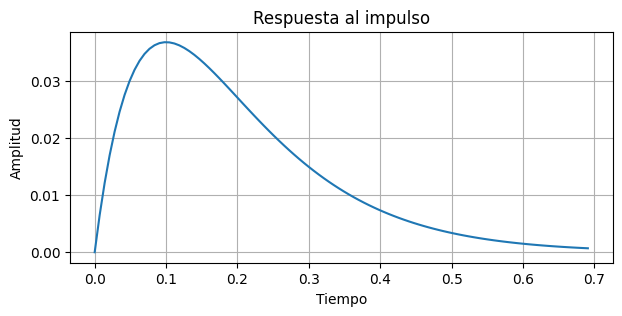

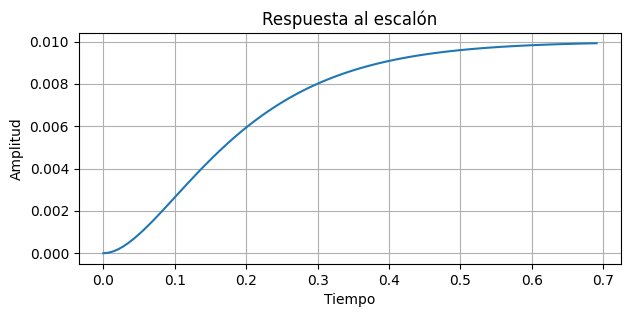

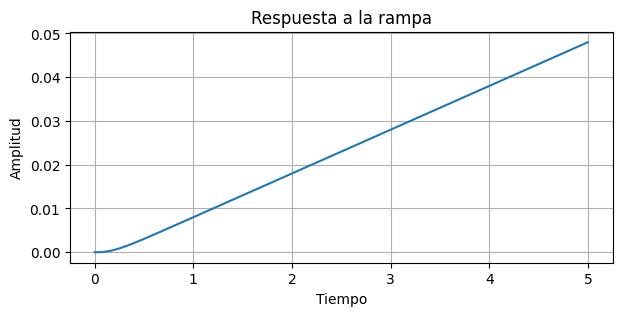

      CASO: Sobreamortiguado
 m = 4, c = 50, k = 100
 wn = 5.0000 rad/s
 zeta = 1.2500
 wd = 0.0000 rad/s (si aplica)


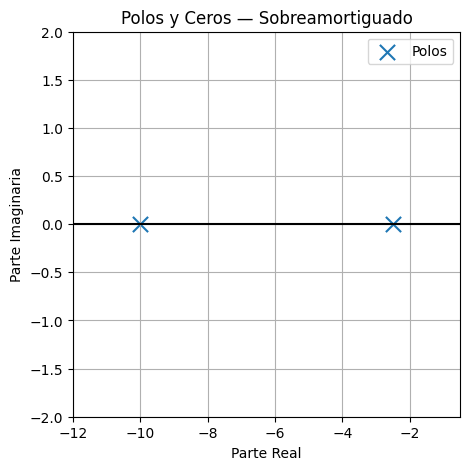

/usr/local/lib/python3.12/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


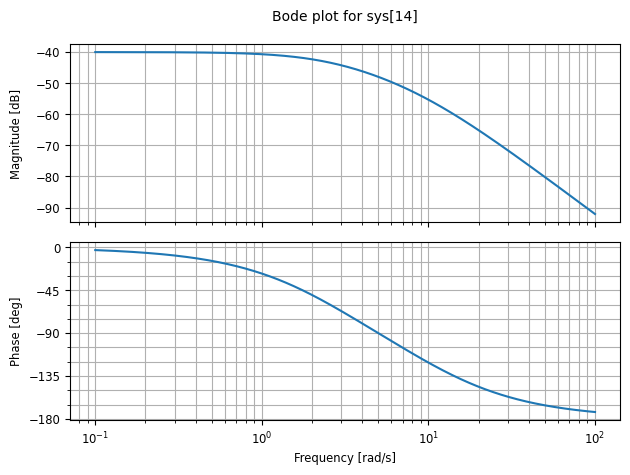

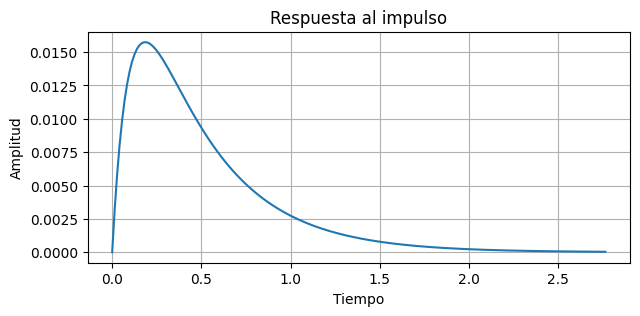

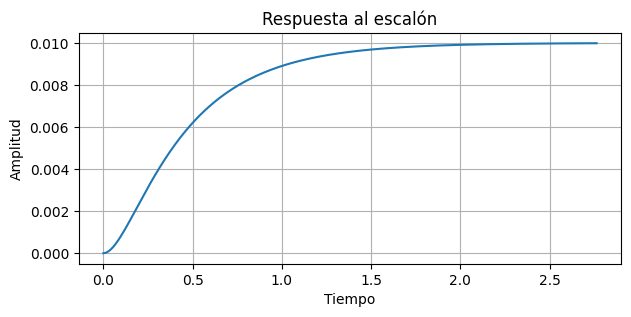

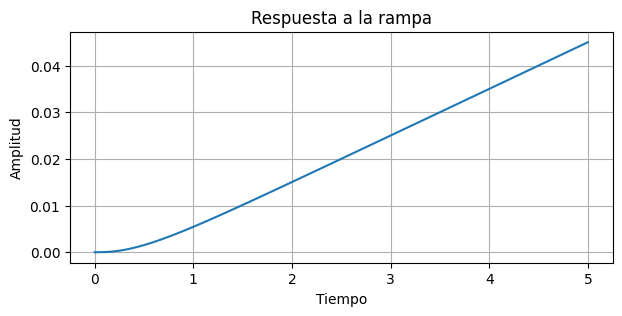

In [4]:

from IPython.display import Markdown, display

# ---- CELDA 1 ----
display(Markdown(r"""
# Simulación Completa de un Sistema Masa–Resorte–Amortiguador (MRA)

Este cuaderno implementa una simulación completa de un sistema dinámico de **segundo orden**, modelado como:

\[
G(s) = \frac{1}{ms^2 + cs + k}
\]

donde m = masa, c = amortiguamiento y k = constante del resorte.

Se analizan tres casos:

1. Subamortiguado  (\(\zeta < 1\))
2. Crítico         (\(\zeta = 1\))
3. Sobreamortiguado (\(\zeta > 1\))

Incluye:

- Polos y ceros
- Bode
- Impulso
- Escalón
- Rampa
- Cálculo de parámetros dinámicos
"""))

# ---- CELDA 2 ----
display(Markdown(r"""
## Importaciones necesarias
"""))

# ---- CÓDIGO ----
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from control import tf, bode, impulse_response, step_response


# ---- CELDA 3 ----
display(Markdown(r"""
## Funciones auxiliares
Estas funciones permiten:
- Graficar polos y ceros
- Graficar Bode
- Respuesta impulso, escalón y rampa
- Calcular parámetros (\(\omega_n, \zeta, \omega_d\))
"""))


# ============================================
# FUNCIONES AUXILIARES COMPLETAS
# ============================================

def plot_pz(sys, title="Polos y Ceros"):
    plt.figure(figsize=(5,5))
    poles = ctrl.poles(sys)
    zeros = ctrl.zeros(sys)

    # Polos y ceros
    plt.scatter(np.real(poles), np.imag(poles), marker='x', s=120, label="Polos")
    if len(zeros) > 0:
        plt.scatter(np.real(zeros), np.imag(zeros), marker='o',
                    s=120, facecolors='none', edgecolors='r', label="Ceros")

    # Ejes
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    # Ajuste de ventana
    all_r = np.real(np.concatenate([poles, zeros])) if len(zeros)>0 else np.real(poles)
    all_i = np.imag(np.concatenate([poles, zeros])) if len(zeros)>0 else np.imag(poles)

    plt.xlim(min(all_r)-2, max(all_r)+2)
    plt.ylim(min(all_i)-2, max(all_i)+2)

    plt.grid()
    plt.legend()
    plt.title(title)
    plt.xlabel("Parte Real")
    plt.ylabel("Parte Imaginaria")
    plt.show()


def plot_bode(sys):
    mag, phase, w = ctrl.bode(sys, dB=True, plot=True)
    plt.show()


def plot_impulse(sys):
    t, y = impulse_response(sys)
    plt.figure(figsize=(7,3))
    plt.plot(t, y)
    plt.grid()
    plt.title("Respuesta al impulso")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.show()


def plot_step(sys):
    t, y = step_response(sys)
    plt.figure(figsize=(7,3))
    plt.plot(t, y)
    plt.grid()
    plt.title("Respuesta al escalón")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.show()


def plot_ramp(sys):
    t = np.linspace(0, 5, 1000)
    u = t
    t_out, y_out = ctrl.forced_response(sys, T=t, U=u)
    plt.figure(figsize=(7,3))
    plt.plot(t_out, y_out)
    plt.grid()
    plt.title("Respuesta a la rampa")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.show()


def calcular_parametros(m, c, k):
    wn = np.sqrt(k/m)
    zeta = c / (2*np.sqrt(k*m))
    wd = wn*np.sqrt(1-zeta**2) if zeta < 1 else 0
    return wn, zeta, wd


# ---- CELDA 4 ----
display(Markdown(r"""
## Definición de los tres casos de amortiguamiento
Se analizan:

- Subamortiguado
- Críticamente amortiguado
- Sobreamortiguado
"""))


# ============================================
# 3 CASOS A EVALUAR
# ============================================

casos = {
    "Subamortiguado":   {"m":1,   "k":100,   "c":1},
    "Crítico":          {"m":1,   "k":100, "c":20},
    "Sobreamortiguado": {"m":4,   "k":100,  "c":50},
}


# ---- CELDA 5 ----
display(Markdown(r"""
# Ejecución de los 3 casos
A continuación se ejecutan TODAS las simulaciones para cada caso.
"""))


# ============================================
# EJECUCIÓN COMPLETA
# ============================================

for nombre, params in casos.items():
    print("====================================")
    print(f"      CASO: {nombre}")
    print("====================================")

    m = params["m"]
    c = params["c"]
    k = params["k"]

    # Función de transferencia
    sys = tf([1], [m, c, k])

    # Parámetros
    wn, zeta, wd = calcular_parametros(m, c, k)
    print(f" m = {m}, c = {c}, k = {k}")
    print(f" wn = {wn:.4f} rad/s")
    print(f" zeta = {zeta:.4f}")
    print(f" wd = {wd:.4f} rad/s (si aplica)")

    # Graficar TODO
    plot_pz(sys, title=f"Polos y Ceros — {nombre}")
    plot_bode(sys)
    plot_impulse(sys)
    plot_step(sys)
    plot_ramp(sys)
